In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

d = pd.read_csv(r"C:\Users\joy\Documents\storedata.csv")
d.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


## Data Processing and Cleaning

In [2]:
# it may not be wrong using label encoding here.
d.groupby('Country')['Competition score'].sum()

Country
France      29
UK        1985
Name: Competition score, dtype: int64

In [3]:
d.size

2584

In [4]:
d.shape

(136, 19)

In [5]:
d.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [6]:
# checking null values
d.isna().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [7]:
d.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

In [8]:
# Checking for duplicates
d.duplicated().sum()

0

In [9]:
sum(d.duplicated())

0

In [10]:
# there are no records of duplicates, the town matches the shape
for i in d.columns:
    print(f"{i} : {d[i].nunique()}")

Town : 136
Country : 2
Store ID : 136
Manager name : 118
Staff : 8
Floor Space : 135
Window : 25
Car park : 4
Demographic score : 10
Location : 4
40min population : 136
30 min population : 136
20 min population : 136
10 min population : 136
Store age : 10
Clearance space : 90
Competition number : 10
Competition score : 10
Performance : 2


In [11]:
for i in d.columns:
    print(f"{i} : {d[i].unique()}")

Town : [' Swinton (Greater Manchester)' ' Stamford' ' Skipton' ' Stratton'
 ' Shepperton' ' Southwell' ' Swinton (South Yorkshire)' ' Sowerby Bridge'
 ' Sheffield' ' Stanley' ' Shepshed' ' Staines' ' Sutton' ' Stafford'
 ' Sawbridgeworth' ' Stocksbridge' ' Salcombe' ' Southminster' ' Slough'
 ' Sedgley' ' St Mawes' ' Sudbury' ' Steyning' ' Southampton' ' Snaith'
 ' Sampford Courtenay' ' Skelmersdale' ' Scunthorpe' ' Sunderland'
 ' Streatham' ' Saxmundham' ' Sandiacre' ' Stretford' ' St Austell'
 ' Stalbridge' ' Southwick' ' Shefford' ' Stanford-le-Hope' ' Swindon'
 ' Stainforth' ' St Helens' ' Stourbridge' ' Swadlincote' ' Sale'
 ' Seaham' ' Southwold' ' Shanklin' ' South Shields' ' Southport'
 ' Stalham' ' Shaw & Crompton' ' South Elmsall' ' St Blazey' ' Sherborne'
 ' Smethwick' ' Stow-on-the-Wold' ' Sandwich' ' Shaftesbury' ' Spalding'
 ' Stockton-on-Tees' ' Stroud' ' Scarborough' ' South Molton' ' Saltash'
 ' Shoeburyness' ' Sutton-in-Ashfield' ' Shifnal' ' Strood' ' Southam'
 ' Shi

In [12]:
d['Car park'] = d['Car park'].replace({
    'Y' : 'Yes',
    'N' : 'No'
})
d['Car park'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
# store id won't be necessary in training our model, it deoesn't decide whether the store is good or bad
# manager names won't be a predictor,  because the performance of the store has nothing to do with the name.
# We are doing feature Selection
# things that can be a predictor are all these things that has town, with the same score, competitive number.
# we will used scaling because of outliers
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Store ID,136.0,5.217258e+04,28725.990237,1437.0,24707.25,56011.5,76870.50,99854.0
Staff,136.0,1.335294e+01,56.592439,-2.0,6.00,7.0,8.00,600.0
Floor Space,136.0,1.502410e+04,2761.801921,10072.0,12793.00,14596.5,17543.75,19869.0
Window,136.0,1.120441e+02,6.884085,100.0,106.75,111.0,118.00,124.0
Demographic score,136.0,1.446324e+01,2.874944,10.0,12.00,14.5,17.00,19.0
40min population,136.0,1.487374e+06,280498.938383,1030405.0,1254949.25,1516337.5,1696352.50,1997044.0
30 min population,136.0,1.249870e+06,216087.516523,1000653.0,1057284.00,1214459.0,1396966.75,1929089.0
20 min population,136.0,1.134533e+06,149027.970296,1000214.0,1012572.75,1077542.0,1203076.75,1723395.0
10 min population,136.0,1.066118e+06,88845.853887,1000002.0,1005593.00,1033228.5,1090349.00,1426533.0
Store age,136.0,6.529412e+00,2.815147,2.0,4.00,6.0,9.00,11.0


<Axes: >

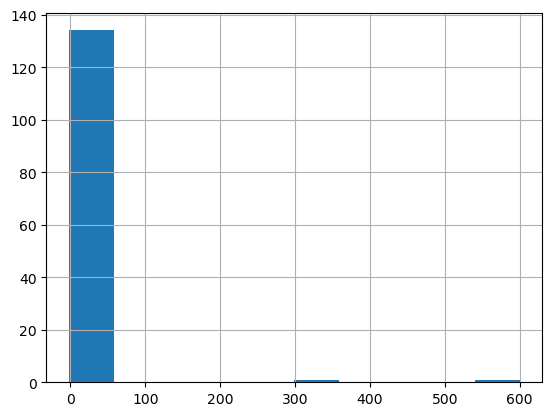

In [14]:
# this is giving outliers
d.Staff.hist()

<Axes: >

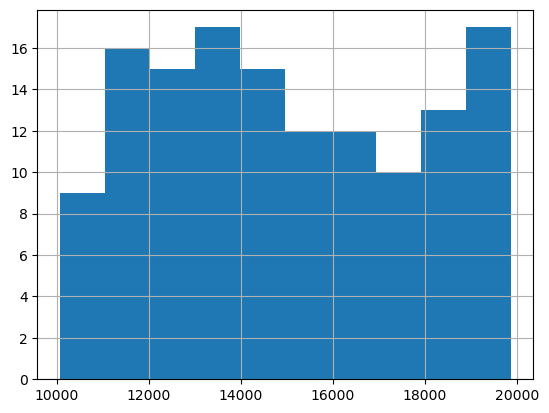

In [15]:
d['Floor Space'].hist()

<Axes: >

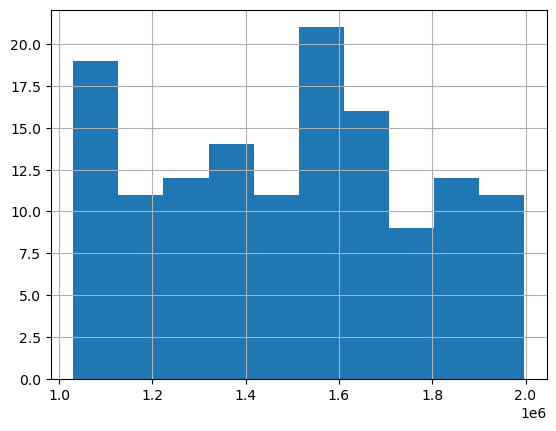

In [16]:
d['40min population'].hist()

<Axes: >

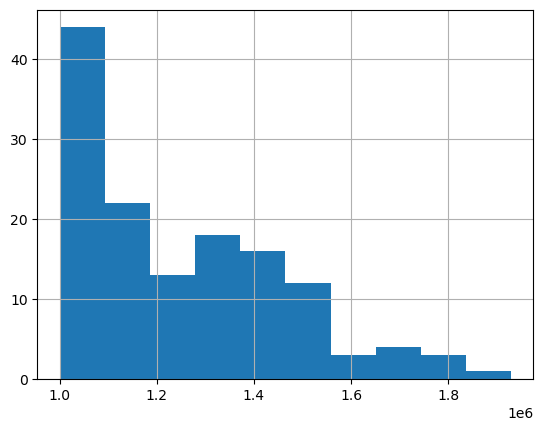

In [17]:
d['30 min population'].hist()

<Axes: xlabel='Count', ylabel='30 min population'>

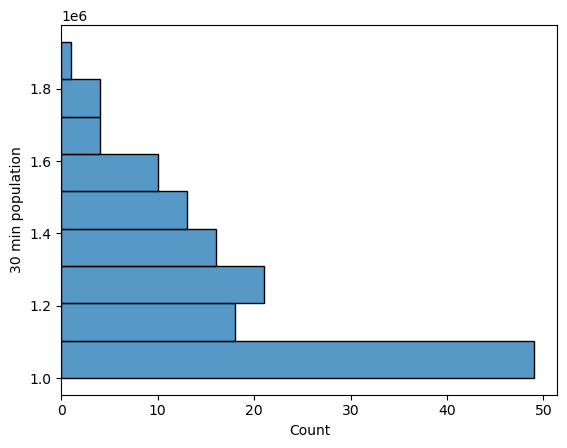

In [18]:
sns.histplot(d, y = '30 min population')

C:\Users\joy\AppData\Local\Temp\ipykernel_2400\550662235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['30 min population'])


<Axes: xlabel='30 min population', ylabel='Density'>

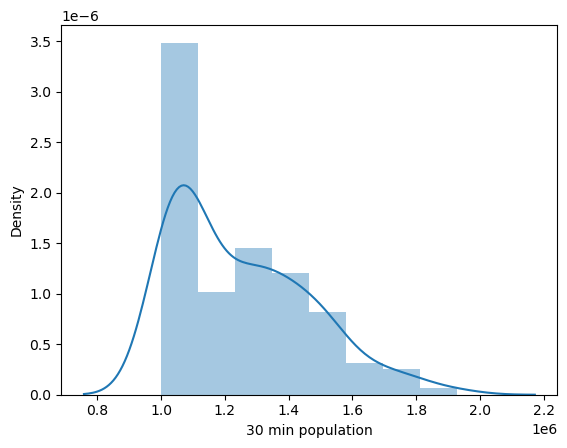

In [19]:
sns.distplot(d['30 min population'])

In [20]:
d.sample(n = 4)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
30,Saxmundham,UK,23249,Mart�n,6,16607,116,Yes,15,Retail Park,1956875,1461685,1405893,1184961,2,233,14,16,Bad
18,Slough,UK,14421,Agustina,9,15219,113,Yes,15,Shopping Centre,1973493,1929089,1429238,1426533,6,324,12,13,Good
33,St Austell,UK,24618,Vin�cius,8,18077,120,Yes,16,High Street,1518005,1057762,1010136,1008599,9,281,10,11,Bad
24,Snaith,UK,19296,Luc�a,9,19337,123,Yes,16,High Street,1137206,1066238,1049975,1041967,5,293,17,19,Good


# Encoding

In [21]:
one_hot = pd.get_dummies(d['Car park'], dtype=int)
one_hot

,No,Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
131,0,1
132,1,0
133,1,0
134,1,0


In [22]:
d = pd.concat([d, one_hot], axis = 1)

In [23]:
d.drop('Car park', axis = 1, inplace = True)

In [24]:
d.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0


In [25]:
d.Location.unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

<Axes: xlabel='Location'>

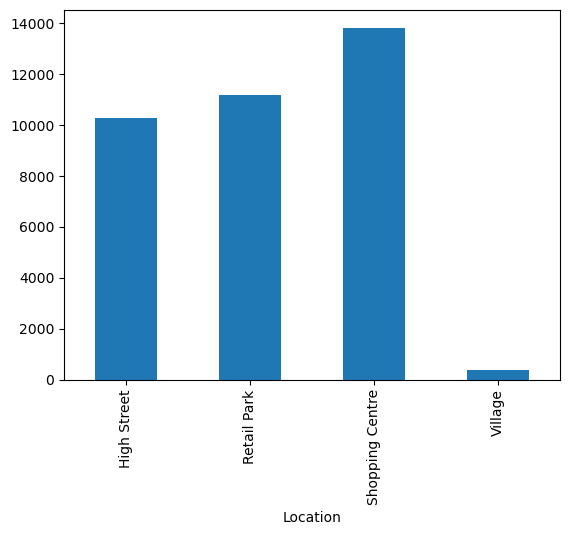

In [26]:
# finding out if these items can be ordered 
# you can give them equal significance.
d.groupby("Location")["Clearance space"].sum().plot(kind='bar')

In [27]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [28]:
# you fit the pattern and transform it scans through and change the state. fiiting doesn't change the state.
d.Location = lb.fit_transform(d.Location)
d.Location

0      1
1      2
2      1
3      0
4      1
      ..
131    1
132    2
133    2
134    0
135    0
Name: Location, Length: 136, dtype: int32

In [29]:
d.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,14,0,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0


In [30]:
d.Country.unique()

array(['UK', 'France'], dtype=object)

In [31]:
o = pd.get_dummies(d.Country, dtype = int)

In [32]:
d = pd.concat([d, o], axis = 1)

In [33]:
d.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,1,1288374,...,1002340,3,238,16,16,Good,0,1,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,2,1086225,...,1008436,4,384,15,19,Good,0,1,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,1,1595638,...,1011395,11,219,13,18,Bad,1,0,0,1
3,Stratton,UK,2055,Antonia,7,17092,117,14,0,1179395,...,1002169,5,261,15,12,Bad,1,0,0,1
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,1,1398558,...,1002513,7,200,19,13,Bad,1,0,0,1


In [34]:
d.drop("Country", axis = 1, inplace = True)

In [35]:
d.head()

,Town,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,Swinton (Greater Manchester),1437,Roger,9,18526,121,10,1,1288374,1138224,...,1002340,3,238,16,16,Good,0,1,0,1
1,Stamford,1544,Ella,8,18569,121,11,2,1086225,1015321,...,1008436,4,384,15,19,Good,0,1,0,1
2,Skipton,2039,Valentina,-2,12288,105,12,1,1595638,1281661,...,1011395,11,219,13,18,Bad,1,0,0,1
3,Stratton,2055,Antonia,7,17092,117,14,0,1179395,1022959,...,1002169,5,261,15,12,Bad,1,0,0,1
4,Shepperton,2141,Gabriel,7,11307,103,18,1,1398558,1085170,...,1002513,7,200,19,13,Bad,1,0,0,1


In [36]:
d.Town.nunique

<bound method IndexOpsMixin.nunique of 0       Swinton (Greater Manchester)
1                           Stamford
2                            Skipton
3                           Stratton
4                         Shepperton
                   ...              
131                   South Benfleet
132                            Sandy
133                        Sheerness
134                          Salford
135                       Stapleford
Name: Town, Length: 136, dtype: object>

In [37]:
d.drop(['Town', 'Store ID', 'Manager name'], inplace = True, axis = 1)

In [38]:
d.head()

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1,0,1
1,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1,0,1
2,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0,0,1
3,7,17092,117,14,0,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0,0,1
4,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0,0,1


In [39]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
d['Performance'] = lb.fit_transform(d.Performance)

In [40]:
# performanceis what we are trying to find out
# abs is invalidating negative signs, removing the negative sign, knowing the strength of the relationship
d.corr()["Performance"].abs()

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score     0.117908
Location              0.350950
40min population      0.099861
30 min population     0.072470
20 min population     0.005909
10 min population     0.001953
Store age             0.034238
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                    0.173044
Yes                   0.173044
France                0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [41]:
threshold = 0.1
selected_data = d.corr()["Performance"].abs()[d.corr()["Performance"].abs() >= threshold]
selected_data

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score     0.117908
Location              0.350950
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                    0.173044
Yes                   0.173044
France                0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [42]:
unselected_data = d.corr()["Performance"].abs()[d.corr()["Performance"].abs() <= threshold]
unselected_data

40min population     0.099861
30 min population    0.072470
20 min population    0.005909
10 min population    0.001953
Store age            0.034238
Name: Performance, dtype: float64

In [43]:
type(pd.DataFrame(selected_data))

pandas.core.frame.DataFrame

In [44]:
pd.DataFrame(selected_data).index

Index(['Staff', 'Floor Space', 'Window', 'Demographic score', 'Location',
       'Clearance space', 'Competition number', 'Competition score',
       'Performance', 'No', 'Yes', 'France', 'UK'],
      dtype='object')

In [45]:
selected = ['Staff', 'Floor Space', 'Window', 'Demographic score', 'Location',
       'Clearance space', 'Competition number', 'Competition score',
       'Performance', 'No', 'Yes', 'France', 'UK']

In [46]:
d = d[selected]
d

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,1,0,1,0,1
1,8,18569,121,11,2,384,15,19,1,0,1,0,1
2,-2,12288,105,12,1,219,13,18,0,1,0,0,1
3,7,17092,117,14,0,261,15,12,0,1,0,0,1
4,7,11307,103,18,1,200,19,13,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,110,13,1,202,18,14,0,0,1,0,1
132,6,11205,103,15,2,203,13,18,0,1,0,0,1
133,7,16190,115,19,2,341,18,18,0,1,0,0,1
134,6,15516,113,17,0,261,14,10,0,1,0,0,1


In [47]:
# Variables and Target
x = d.drop("Performance", axis = 1, )
y = d.Performance

In [48]:
x.head()

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,0,1,0,1
1,8,18569,121,11,2,384,15,19,0,1,0,1
2,-2,12288,105,12,1,219,13,18,1,0,0,1
3,7,17092,117,14,0,261,15,12,1,0,0,1
4,7,11307,103,18,1,200,19,13,1,0,0,1


# Model Training

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, shuffle = True, random_state = 41)

In [50]:
print(f"The shape of our x_train is {x_train.shape}")
print(f"The shape of our x_test is {x_test.shape}")
print(f"The shape of our y_train is {y_train.shape}")
print(f"The shape of our y_test is {y_test.shape}")

The shape of our x_train is (95, 12)
The shape of our x_test is (41, 12)
The shape of our y_train is (95,)
The shape of our y_test is (41,)


In [51]:
from sklearn.svm import SVC

In [52]:
scm = SVC()

In [53]:
scm.fit(x_train, y_train)
scm.score(x_train, y_train).round(2) * 100

65.0

# Testing

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
scm.predict(x_test)
accuracy_score(y_test, scm.predict(x_test)).round(2)*100

63.0

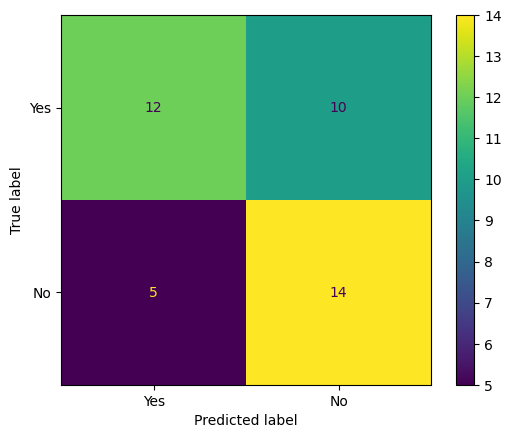

In [55]:
label = ["Yes", "No"]
ConfusionMatrixDisplay(confusion_matrix(y_test, scm.predict(x_test)), display_labels = label).plot()